In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil
import time
from sklearn.preprocessing import LabelEncoder



In [3]:
ts = time.time()

data = pd.read_csv('input/drug_purchases.csv', parse_dates=['purchase_date'])
display(data.head())
display(data.dtypes);

# Convert date from string to date times
data[['purchase_month', 'purchase_year']] = data['purchase_date'].apply(lambda x: pd.Series(x.strftime("%Y-%m,%Y").split(",")))
# data[[]] = data['purchase_date'].apply(lambda x: pd.Series(x.strftime("%Y")))

ts_2 = time.time()

display(ts_2 - ts)

display(data.shape)

display(data.head())
display(data.tail())

,id,log_id,layout_id,staging_record_id,created_by,created_at,modified_by,modified_at,deleted,address,...,ndc11code,purchase_date,unit_price,drug_name,drug_class,state,drug_indication,person_code,pharmacy,zip
0,410,46,87,595,SYSTEM,2018-10-08 21:30:06,SYSTEM,2018-10-08 21:30:06,False,5208 98TH ST,...,93001298,2016-01-05,0.1327,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,TX,Ulcer,17546398,CVS PHARMACY,79424
1,2387,46,87,2612,SYSTEM,2018-10-08 21:30:27,SYSTEM,2018-10-08 21:30:27,False,251 N BROADWAY,...,54001729,2016-01-19,0.2450,PREDNISONE TAB 10MG,CORTICOSTEROIDS,NJ,Inflammation,17427509,SAVON PHARMACY,8070
2,2411,46,87,2587,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,2040 ROUTE 130,...,59762015502,2016-01-19,0.2734,ATORVASTATIN TAB 10MG,ANTIHYPERLIPIDEMICS,NJ,High Cholesterol,17112961,EXPRESS SCRIPTS,80169716
3,2436,46,87,2565,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,5230 DALLAS HWY,...,310080060,2016-01-18,304.5100,TUDORZA PRES AER 400/ACT,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,GA,Asthma,17427513,WALGREENS #6325,30127
4,2461,46,87,2540,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,1704 W HILLSBOROUGH,...,59746028490,2016-01-18,0.1813,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,FL,Ulcer,17106797,WALGREENS #6611,33603


id                            int64
log_id                        int64
layout_id                     int64
staging_record_id             int64
created_by                   object
created_at                   object
modified_by                  object
modified_at                  object
deleted                        bool
address                      object
age                           int64
city                         object
lattitude                   float64
longitude                   float64
ndc11code                     int64
purchase_date        datetime64[ns]
unit_price                  float64
drug_name                    object
drug_class                   object
state                        object
drug_indication              object
person_code                   int64
pharmacy                     object
zip                          object
dtype: object

41.38291907310486

(184250, 26)

,id,log_id,layout_id,staging_record_id,created_by,created_at,modified_by,modified_at,deleted,address,...,unit_price,drug_name,drug_class,state,drug_indication,person_code,pharmacy,zip,purchase_month,purchase_year
0,410,46,87,595,SYSTEM,2018-10-08 21:30:06,SYSTEM,2018-10-08 21:30:06,False,5208 98TH ST,...,0.1327,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,TX,Ulcer,17546398,CVS PHARMACY,79424,2016-01,2016
1,2387,46,87,2612,SYSTEM,2018-10-08 21:30:27,SYSTEM,2018-10-08 21:30:27,False,251 N BROADWAY,...,0.2450,PREDNISONE TAB 10MG,CORTICOSTEROIDS,NJ,Inflammation,17427509,SAVON PHARMACY,8070,2016-01,2016
2,2411,46,87,2587,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,2040 ROUTE 130,...,0.2734,ATORVASTATIN TAB 10MG,ANTIHYPERLIPIDEMICS,NJ,High Cholesterol,17112961,EXPRESS SCRIPTS,80169716,2016-01,2016
3,2436,46,87,2565,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,5230 DALLAS HWY,...,304.5100,TUDORZA PRES AER 400/ACT,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,GA,Asthma,17427513,WALGREENS #6325,30127,2016-01,2016
4,2461,46,87,2540,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,1704 W HILLSBOROUGH,...,0.1813,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,FL,Ulcer,17106797,WALGREENS #6611,33603,2016-01,2016


,id,log_id,layout_id,staging_record_id,created_by,created_at,modified_by,modified_at,deleted,address,...,unit_price,drug_name,drug_class,state,drug_indication,person_code,pharmacy,zip,purchase_month,purchase_year
184245,184134,46,87,184116,SYSTEM,2018-10-08 22:04:42,SYSTEM,2018-10-08 22:04:42,False,10427 BIG BEND RD,...,0.2237,IRBESARTAN TAB 150MG,ANTIHYPERTENSIVES,FL,Hypertension,21713506,WALGREENS #9297,33578,2018-09,2018
184246,184156,46,87,184090,SYSTEM,2018-10-08 22:04:42,SYSTEM,2018-10-08 22:04:42,False,625 N BLACK HORSE PIKE,...,8.3370,DEXILANT CAP 30MG DR,ULCER DRUGS,NJ,Ulcer,17427422,WALGREENS #1531,8012,2018-09,2018
184247,184180,46,87,184072,SYSTEM,2018-10-08 22:04:42,SYSTEM,2018-10-08 22:04:42,False,5601 SARATOGA BLVD,...,0.3010,AMOXICILLIN CAP 500MG,PENICILLINS,TX,Bacterial Infection,19614195,WALGREENS #3638,78414,2018-09,2018
184248,184204,46,87,184045,SYSTEM,2018-10-08 22:04:43,SYSTEM,2018-10-08 22:04:43,False,4425 19TH ST,...,0.0973,LISINOP/HCTZ TAB 20-25MG,ANTIHYPERTENSIVES,TX,Hypertension,17172271,MARKET STREET PHARMACY #553,79407,2018-09,2018
184249,184231,46,87,184020,SYSTEM,2018-10-08 22:04:43,SYSTEM,2018-10-08 22:04:43,False,4750 E 450 S,...,0.0626,LOSARTAN POT TAB 50MG,ANTIHYPERTENSIVES,IN,Hypertension,17106193,EXPRESS SCRIPTS,460758404,2018-09,2018


In [103]:
data["cat_drug_class"] = LabelEncoder().fit_transform(data["drug_class"])
data["cat_drug_indication"] = LabelEncoder().fit_transform(data["drug_indication"])
data["cat_state"] = LabelEncoder().fit_transform(data["state"])
data[["drug_class", "cat_drug_class", "drug_indication", "cat_drug_indication", "state", "cat_state"]].head(11)

,drug_class,cat_drug_class,drug_indication,cat_drug_indication,state,cat_state
0,ULCER DRUGS,84,Ulcer,117,TX,43
1,CORTICOSTEROIDS,42,Inflammation,60,NJ,30
2,ANTIHYPERLIPIDEMICS,24,High Cholesterol,51,NJ,30
3,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,13,Asthma,14,GA,9
4,ULCER DRUGS,84,Ulcer,117,FL,8
5,ANTIHYPERTENSIVES,25,Hypertension,55,PA,37
6,ANTIFUNGALS,22,\N,126,IL,13
7,CORTICOSTEROIDS,42,Inflammation,60,NY,33
8,DIURETICS,48,Diuretic,35,TX,43
9,CALCIUM CHANNEL BLOCKERS,35,Hypertension,55,TX,43


In [105]:
arry = data["state"].unique()
display(arry)
print(arry)
len(arry)

array(['TX', 'NJ', 'GA', 'FL', 'PA', 'IL', 'NY', 'IN', 'WI', 'OH', 'CA',
       'ME', 'MO', 'MS', 'AL', 'VA', 'AZ', 'NC', 'UT', 'MA', 'WV', 'DE',
       'TN', 'LA', 'SC', 'NV', 'CT', 'KY', 'MD', 'WA', 'MI', 'NH', 'MT',
       'WY', 'VT', 'OR', 'RI', 'IA', 'AR', 'MN', 'DC', 'ID', 'NE', 'OK',
       'CO', 'ND', 'HI', 'KS', 'SD', 'PR', 'NM'], dtype=object)

['TX' 'NJ' 'GA' 'FL' 'PA' 'IL' 'NY' 'IN' 'WI' 'OH' 'CA' 'ME' 'MO' 'MS'
 'AL' 'VA' 'AZ' 'NC' 'UT' 'MA' 'WV' 'DE' 'TN' 'LA' 'SC' 'NV' 'CT' 'KY'
 'MD' 'WA' 'MI' 'NH' 'MT' 'WY' 'VT' 'OR' 'RI' 'IA' 'AR' 'MN' 'DC' 'ID'
 'NE' 'OK' 'CO' 'ND' 'HI' 'KS' 'SD' 'PR' 'NM']


51

In [132]:
from fbprophet import Prophet

m_df = data[['purchase_month', 'unit_price']]

mod_data = m_df.copy();
m_df_sum = pd.DataFrame({'unit_price' : mod_data.groupby(["purchase_month"])['unit_price'].sum()}).reset_index()

m_df_count = pd.DataFrame({'unit_price' : mod_data.groupby(["purchase_month"])['unit_price'].count()}).reset_index()

(33, 2)

(26, 2)

(7, 2)

In [124]:
m_df1_sum = m_df_sum.copy()
m_df1_sum.rename(columns={'purchase_month': 'ds',
                   'unit_price': 'y'},
          inplace=True)

display(m_df1_sum.shape)
m_df1_sum.head()
m_df1_sum.tail()

(33, 2)

,ds,y
28,2018-05,132875.2189
29,2018-06,143020.6578
30,2018-07,81920.6468
31,2018-08,130947.5554
32,2018-09,109867.8939


In [7]:
m_df1_count = m_df_count.copy()
m_df1_count.rename(columns={'purchase_month': 'ds',
                   'unit_price': 'y'},
          inplace=True)

m_df1_count.head()

,ds,y
0,2016-01,4500
1,2016-02,4641
2,2016-03,5133
3,2016-04,4678
4,2016-05,4800


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,76341.383731,42850.252381,86680.791117,76341.383731,76341.383731,-11126.972294,-11126.972294,-11126.972294,-11126.972294,-11126.972294,-11126.972294,0.0,0.0,0.0,65214.411437
1,2016-02-01,77559.801449,43429.717859,88950.984824,77559.801449,77559.801449,-11108.883463,-11108.883463,-11108.883463,-11108.883463,-11108.883463,-11108.883463,0.0,0.0,0.0,66450.917986
2,2016-03-01,78699.611546,64099.177132,108767.098874,78699.611546,78699.611546,7561.680325,7561.680325,7561.680325,7561.680325,7561.680325,7561.680325,0.0,0.0,0.0,86261.291871
3,2016-04-01,79918.029287,66845.919247,112715.892809,79918.029287,79918.029287,9319.298215,9319.298215,9319.298215,9319.298215,9319.298215,9319.298215,0.0,0.0,0.0,89237.327502
4,2016-05-01,81097.143236,71517.018655,117604.694856,81097.143236,81097.143236,13911.850279,13911.850279,13911.850279,13911.850279,13911.850279,13911.850279,0.0,0.0,0.0,95008.993516


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
58,2018-09-27,115645.302920,104696.895337,148860.318547,115645.302771,115645.303119,9289.617279,9289.617279,9289.617279,9289.617279,9289.617279,9289.617279,0.0,0.0,0.0,124934.920199
59,2018-09-28,115684.607030,99985.226374,148248.253766,115684.606868,115684.607244,9452.251490,9452.251490,9452.251490,9452.251490,9452.251490,9452.251490,0.0,0.0,0.0,125136.858520
60,2018-09-29,115723.911139,102383.128515,147533.331661,115723.910960,115723.911374,9460.525879,9460.525879,9460.525879,9460.525879,9460.525879,9460.525879,0.0,0.0,0.0,125184.437018
61,2018-09-30,115763.215248,102122.393266,148797.157828,115763.215053,115763.215495,9307.613074,9307.613074,9307.613074,9307.613074,9307.613074,9307.613074,0.0,0.0,0.0,125070.828322
62,2018-10-01,115802.519357,101514.550476,146506.369121,115802.519143,115802.519626,8989.975015,8989.975015,8989.975015,8989.975015,8989.975015,8989.975015,0.0,0.0,0.0,124792.494372


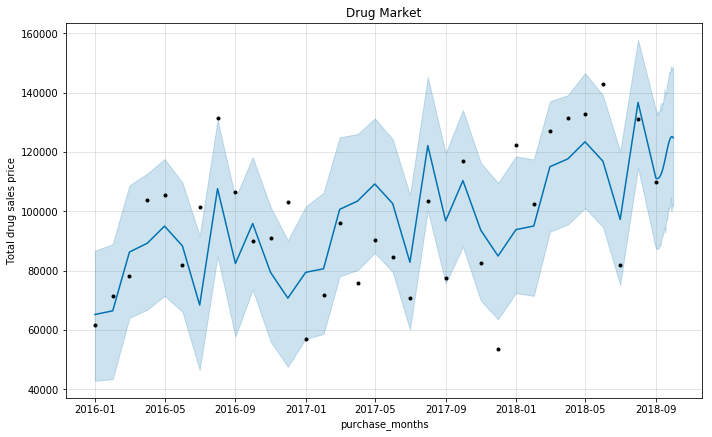

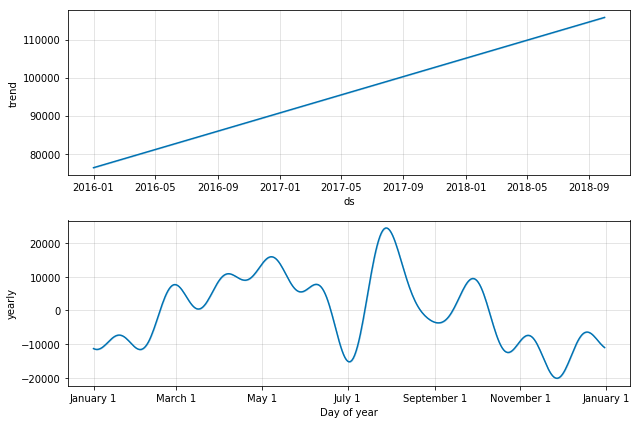

In [141]:
m = Prophet(weekly_seasonality=False, daily_seasonality=False)
m.fit(m_df1_sum)
m_forecast = m.make_future_dataframe(periods=30, freq='D')
m_forecast = m.predict(m_forecast)

display(m_forecast.head())
display(m_forecast.tail())

fig = m.plot(m_forecast, xlabel='purchase_months', ylabel='Total drug sales price')
plt.title('Drug Market')
plt.show()

m.plot_components(m_forecast)
plt.show()

INFO:fbprophet:n_changepoints greater than number of observations.Using 19.0.


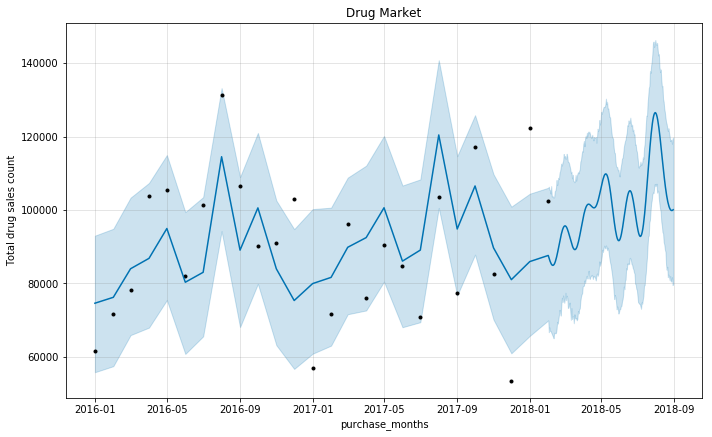

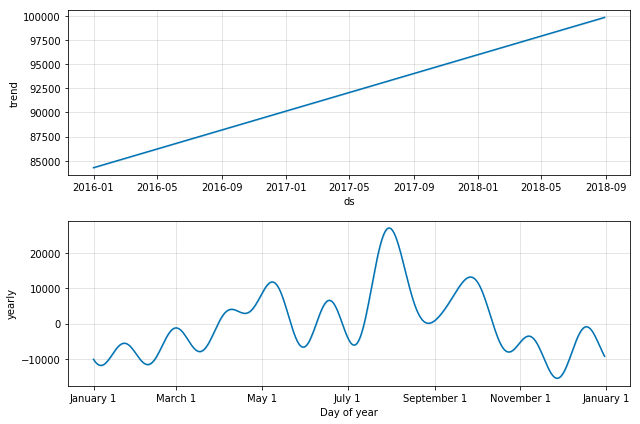

In [142]:
msk = int(len(m_df1_sum) * 0.8)
m_df1_sum_train = m_df1_sum[:msk]
m_train = Prophet(weekly_seasonality=False, daily_seasonality=False)

m_train.fit(m_df1_sum_train)
m_forecast_train = m_train.make_future_dataframe(periods=210, freq='D')
m_forecast_train = m_train.predict(m_forecast_train)
fig = m_train.plot(m_forecast_train, xlabel='purchase_months', ylabel='Total drug sales count')
plt.title('Drug Market')
plt.show()

m_train.plot_components(m_forecast_train)
plt.show()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,3969.836274,3824.467301,5585.608295,3969.836274,3969.836274,690.983038,690.983038,690.983038,690.983038,690.983038,690.983038,0.0,0.0,0.0,4660.819312
1,2016-02-01,4061.446493,3505.531409,5209.413289,4061.446493,4061.446493,303.386443,303.386443,303.386443,303.386443,303.386443,303.386443,0.0,0.0,0.0,4364.832936
2,2016-03-01,4147.146375,4046.566157,5763.873288,4147.146375,4147.146375,772.880882,772.880882,772.880882,772.880882,772.880882,772.880882,0.0,0.0,0.0,4920.027256
3,2016-04-01,4238.756594,3623.637759,5304.524507,4238.756594,4238.756594,228.296530,228.296530,228.296530,228.296530,228.296530,228.296530,0.0,0.0,0.0,4467.053123
4,2016-05-01,4327.411644,3839.157733,5495.344250,4327.411644,4327.411644,323.278324,323.278324,323.278324,323.278324,323.278324,323.278324,0.0,0.0,0.0,4650.689968


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
393,2019-08-28,8735.577352,6233.873095,7992.142933,8693.851845,8777.603635,-1632.469336,-1632.469336,-1632.469336,-1632.469336,-1632.469336,-1632.469336,0.0,0.0,0.0,7103.108016
394,2019-08-29,8739.486561,6430.398043,8100.952681,8697.525239,8781.655805,-1508.423482,-1508.423482,-1508.423482,-1508.423482,-1508.423482,-1508.423482,0.0,0.0,0.0,7231.063079
395,2019-08-30,8743.395770,6576.705544,8267.450633,8701.198634,8785.696470,-1373.199590,-1373.199590,-1373.199590,-1373.199590,-1373.199590,-1373.199590,0.0,0.0,0.0,7370.196180
396,2019-08-31,8747.304979,6653.471988,8327.865468,8704.921353,8789.725731,-1229.267012,-1229.267012,-1229.267012,-1229.267012,-1229.267012,-1229.267012,0.0,0.0,0.0,7518.037966
397,2019-09-01,8751.214187,6771.146007,8532.416778,8708.662396,8793.722105,-1079.221483,-1079.221483,-1079.221483,-1079.221483,-1079.221483,-1079.221483,0.0,0.0,0.0,7671.992705


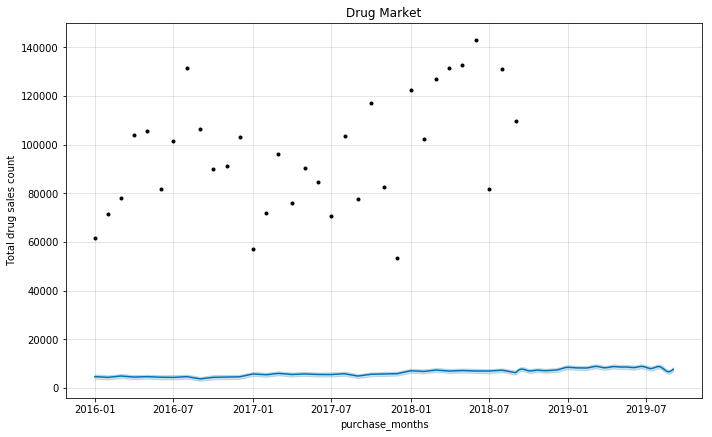

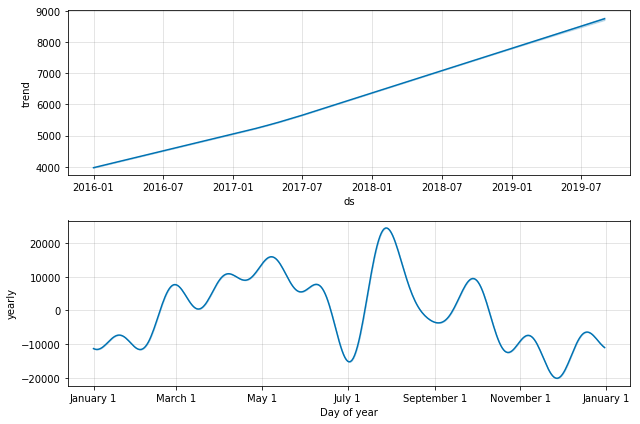

In [143]:
m_count = Prophet(weekly_seasonality=False, daily_seasonality=False)
m_count.fit(m_df1_count)
m_count_forecast = m_count.make_future_dataframe(periods=365, freq='D')
m_count_forecast = m_count.predict(m_count_forecast)

display(m_count_forecast.head())
display(m_count_forecast.tail())

fig = m.plot(m_count_forecast, xlabel='purchase_months', ylabel='Total drug sales count')
plt.title('Drug Market')
plt.show()

m.plot_components(m_count_forecast)
plt.show()

In [12]:
# How many rows the dataset
data['id'].count()

184250

In [13]:
# What was the highest unit_price?
data['unit_price'].max()

32032.06

In [14]:
# How many entries are there for each month?
data['drug_indication'].value_counts();

In [15]:
data['drug_class'].value_counts();

In [16]:
data['person_code'].value_counts();

In [26]:
data['pharmacy'].value_counts();

In [18]:
data['state'].value_counts();

In [25]:
data.groupby(['person_code', 'pharmacy'])['id'].count();


In [144]:
data.groupby(['person_code', 'drug_name'])['id'].count()

person_code  drug_name                
13132450     AMOXICILLIN CAP 500MG         2
             AMOXICILLIN TAB 875MG         1
             CETIRIZINE TAB 10MG          11
             FLOVENT HFA AER 110MCG        1
             MONTELUKAST CHW 5MG           6
             MONTELUKAST TAB 10MG          1
             OSELTAMIVIR CAP 75MG          1
             PREDNISONE TAB 10MG           1
             PROAIR HFA AER                1
             VENTOLIN HFA AER             17
13133262     FALMINA TAB                   1
             LUTERA TAB                    8
             VESTURA TAB 3-0.02MG          7
13133575     AZATHIOPRINE TAB 50MG         4
             AZITHROMYCIN TAB 250MG        3
             CIPROFLOXACN TAB 500MG        2
             CLONIDINE DIS 0.2/24HR        7
             CYCLOBENZAPR TAB 10MG         4
             DICYCLOMINE CAP 10MG          8
             DULERA AER 200-5MCG           1
             FLUCONAZOLE TAB 150MG         3
             HYO

In [117]:
data.groupby(['pharmacy', 'drug_class'])['id'].count()

pharmacy                      drug_class                                       
1ST CHOICE PRESCRIPTIONS LLC  PENICILLINS                                            1
303 UPGRADE PHARMACY          PENICILLINS                                            1
4U PHARMACY                   DERMATOLOGICALS                                        1
                              DIAGNOSTIC PRODUCTS                                    1
                              MEDICAL DEVICES AND SUPPLIES                           4
A1 CARE PHARMACY              DERMATOLOGICALS                                        4
ABC PHARMACY                  DERMATOLOGICALS                                       12
ACCREDO HEALTH GROUP          ANALGESICS - ANTI-INFLAMMATORY                        48
                              ANTICOAGULANTS                                         7
                              ANTIHYPERLIPIDEMICS                                    9
                              ANTINEOPLASTICS AND 

In [120]:
data.groupby(['drug_class'])['pharmacy','unit_price']

drug_class                                     pharmacy                      
ADHD/ANTI-NARCOLEPSY/ANTI-OBESITY/ANOREXIANTS  ALLCARE PHARMACY                    73.4436
                                               ARNOLD PROFESSIONAL PHARMACY        68.3087
                                               ATHENA PHARMACY                    191.9857
                                               AUM PHARMACY                        11.3245
                                               AVANCE CARE PHARMACY                 7.1440
                                               BI LO PHARMACY 5228                  1.0227
                                               BI-LO PHARMACY                      12.8537
                                               BLITZ PHARMACY                       1.5134
                                               BORDONARO'S PHARMACY                12.4570
                                               BRIARGROVE PHARMACY                 17.8427
            

In [207]:
data.groupby(['state', 'pharmacy'])['purchase_date'].count();

In [38]:
data.groupby(['person_code', 'drug_indication'])['unit_price'].sum()

person_code  drug_indication           
13132450     Allergies                        2.6401
             Asthma                          80.0901
             Bacterial Infection              1.0282
             Flu                             12.7800
             Inflammation                     0.2244
13133262     Contraception                   20.1952
13133575     Allergies                       35.5793
             Anxiety                          0.5185
             Asthma                          22.4638
             Bacterial Infection              5.4015
             Diabetes                         0.0733
             Gastrointestinal              6819.2193
             Hypertension                   214.2647
             Immunosupressant                 1.8957
             Inflammation                     1.1535
             Insomnia                         0.7906
             Muscle Relaxant                  0.1555
             Pain - Opioid                   21.0874
      

In [117]:
data['purchase_date'].value_counts();

In [37]:
data.groupby(['state'])['drug_indication'].describe()

,count,unique,top,freq
state,,,,
AL,1176,62,Bacterial Infection,127
AR,1422,60,Hypertension,224
AZ,3517,77,Hypertension,764
CA,4344,77,Bacterial Infection,474
CO,103,24,Thyroid Treatment,13
CT,3165,66,Bacterial Infection,337
DC,26,12,Herpes,8
DE,1313,65,Inflammatory disease,242
FL,6917,87,Hypertension,983


In [118]:
data['purchase_month'].value_counts();

In [34]:
data['drug_indication'].value_counts()

Hypertension                       24018
Depression                         15778
Bacterial Infection                14293
High Cholesterol                   12045
Diabetes                            8753
Pain - Opioid                       7241
Contraception                       7074
Ulcer                               6988
Asthma                              6689
Thyroid Treatment                   5822
Seizures                            5741
Inflammation - NSAID                4860
Anxiety                             4374
ADHD                                3867
Diuretic                            3854
Inflammation                        3675
Muscle Relaxant                     2415
Opthalmic Agents                    2331
Cold                                2253
Cough/Cold/Allergy                  2152
Hormone Treatment                   1997
Insomnia                            1942
Topical Corticosteroids             1686
Allergies                           1582
Parenteral Suppl

In [119]:
data.groupby(['drug_class', 'purchase_month'])['id'].count();

In [33]:
data.groupby(['drug_indication', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['drug_indication','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('drug_indication').head(3)

,drug_indication,purchase_year,count
2,ADHD,2018,1483
0,ADHD,2016,1198
1,ADHD,2017,1186
3,Acne Products,2016,359
5,Acne Products,2018,350
4,Acne Products,2017,315
8,Addison's disease,2018,25
7,Addison's disease,2017,21
6,Addison's disease,2016,12
9,Adjuvant Agents,2018,1


In [120]:
data.groupby(['state', 'purchase_month'])['id'].count();

In [121]:
grouped = data.groupby(['state', 'purchase_month'])['id'].count().reset_index(name='count').sort_values(['state','count'], ascending=[True, False]).groupby('state').head(5)
grouped;

In [116]:
data.groupby(['person_code', 'purchase_month'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['person_code','count', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('person_code').head(3)


,person_code,purchase_month,count
22,13132450,2018-08,5
20,13132450,2018-04,3
17,13132450,2017-12,3
30,13133262,2016-08,2
37,13133262,2017-03,1
36,13133262,2017-02,1
43,13133575,2016-06,14
45,13133575,2016-08,12
46,13133575,2016-09,11
62,13133736,2017-01,3


In [175]:
data.groupby(['person_code', 'purchase_month'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['person_code','sum', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('person_code').head(3);

In [125]:
data.groupby(['state', 'purchase_month'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['state','count', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('state').head(3);


In [178]:
data.groupby(['state', 'purchase_month'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['state','sum', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('state').head(3);

In [200]:
data.groupby(['state', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['state','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('state').head(3);


In [201]:
data.groupby(['state', 'purchase_year'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['state','sum', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('state').head(3);

In [203]:
data.groupby(['person_code', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['person_code','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('person_code').head(3);


In [213]:
data.groupby(['person_code', 'purchase_year'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['person_code','sum', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('person_code').head(3);


In [28]:
csv_data = data.groupby(['pharmacy', 'drug_indication'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['pharmacy','count', 'drug_indication'], ascending=[True, False, False]) \
    .groupby('pharmacy').head(3);

isinstance(csv_data, pd.DataFrame)

True

In [39]:
data.groupby(['person_code', 'drug_indication'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['person_code','sum', 'drug_indication'], ascending=[True, False, False]) \
    .groupby('person_code').head(3)

,person_code,drug_indication,sum
1,13132450,Asthma,80.0901
3,13132450,Flu,12.7800
0,13132450,Allergies,2.6401
5,13133262,Contraception,20.1952
11,13133575,Gastrointestinal,6819.2193
12,13133575,Hypertension,214.2647
6,13133575,Allergies,35.5793
24,13133736,Ear Agents,26.0520
23,13133736,Bacterial Infection,7.6004
25,13133736,Opthalmic Agents,3.6560


In [50]:
data.groupby(['person_code', 'drug_indication'])['unit_price'] \
    .mean() \
    .reset_index(name='count') \
    .sort_values(['person_code', 'count', 'drug_indication'], ascending=[True, False, False]) \
    .groupby('person_code').head(3)

,person_code,drug_indication,count
3,13132450,Flu,12.780000
1,13132450,Asthma,3.080388
2,13132450,Bacterial Infection,0.342733
5,13133262,Contraception,1.262200
11,13133575,Gastrointestinal,852.402413
8,13133575,Asthma,22.463800
12,13133575,Hypertension,14.284313
24,13133736,Ear Agents,26.052000
25,13133736,Opthalmic Agents,3.656000
23,13133736,Bacterial Infection,1.900100


In [52]:
data.groupby(['city', 'drug_indication'])[''] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['city', 'count', 'drug_indication'], ascending=[True, False, False]) \
    .groupby('city').head(3)

,city,drug_indication,count
1,ABERNATHY,Inflammation,1
0,ABERNATHY,Bacterial Infection,1
2,ABILENE,Atopic Dermatitis,1
7,ABITA SPRINGS,Depression,9
10,ABITA SPRINGS,Inflammation - NSAID,5
6,ABITA SPRINGS,Cold,4
15,ABSECON,Depression,4
17,ABSECON,Thyroid Treatment,3
18,ABSECON,Ulcer,2
21,ACWORTH,Inflammation - NSAID,5


In [53]:
data.groupby(['purchase_month', 'city'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['purchase_month', 'count'], ascending=[True, False]) \
    .groupby('purchase_month').head(3)

,purchase_month,city,count
641,2016-01,WHITESTOWN,459
69,2016-01,BURLINGTON,410
326,2016-01,LUBBOCK,189
743,2016-02,BURLINGTON,435
1322,2016-02,WHITESTOWN,290
1008,2016-02,LUBBOCK,204
1428,2016-03,BURLINGTON,489
1886,2016-03,SAINT LOUIS,203
1688,2016-03,LUBBOCK,199
2130,2016-04,BURLINGTON,383


In [69]:
data.groupby(['city', 'drug_class'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['city', 'count', 'drug_class'], ascending=[True, False, False]) \
    .groupby('city').head(3)

,city,drug_class,count
1,ABERNATHY,PENICILLINS,1
0,ABERNATHY,CORTICOSTEROIDS,1
2,ABILENE,DERMATOLOGICALS,1
7,ABITA SPRINGS,ANTIDEPRESSANTS,9
4,ABITA SPRINGS,ANALGESICS - ANTI-INFLAMMATORY,5
11,ABITA SPRINGS,NASAL AGENTS - SYSTEMIC AND TOPICAL,4
14,ABSECON,ANTIDEPRESSANTS,4
16,ABSECON,THYROID AGENTS,3
17,ABSECON,ULCER DRUGS,2
18,ACWORTH,ANALGESICS - ANTI-INFLAMMATORY,5


In [74]:
data.groupby(['drug_class'])['unit_price'] \
    .mean() \
    .reset_index(name='sum') \
    .sort_values(['sum', 'drug_class'], ascending=[False, False]) \
    .groupby('drug_class').head(3)

,drug_class,sum
75,PASSIVE IMMUNIZING AND TREATMENT AGENTS,1529.136261
70,NEUROMUSCULAR AGENTS,893.207069
20,ANTIDOTES AND SPECIFIC ANTAGONISTS,296.936322
52,GASTROINTESTINAL AGENTS - MISC.,291.190233
89,VASOPRESSORS,197.511548
3,ANALGESICS - ANTI-INFLAMMATORY,182.693072
79,PSYCHOTHERAPEUTIC AND NEUROLOGICAL AGENTS - MISC.,177.728114
49,ENDOCRINE AND METABOLIC AGENTS - MISC.,167.794677
80,RESPIRATORY AGENTS - MISC.,149.132200
44,DERMATOLOGICALS,123.938116


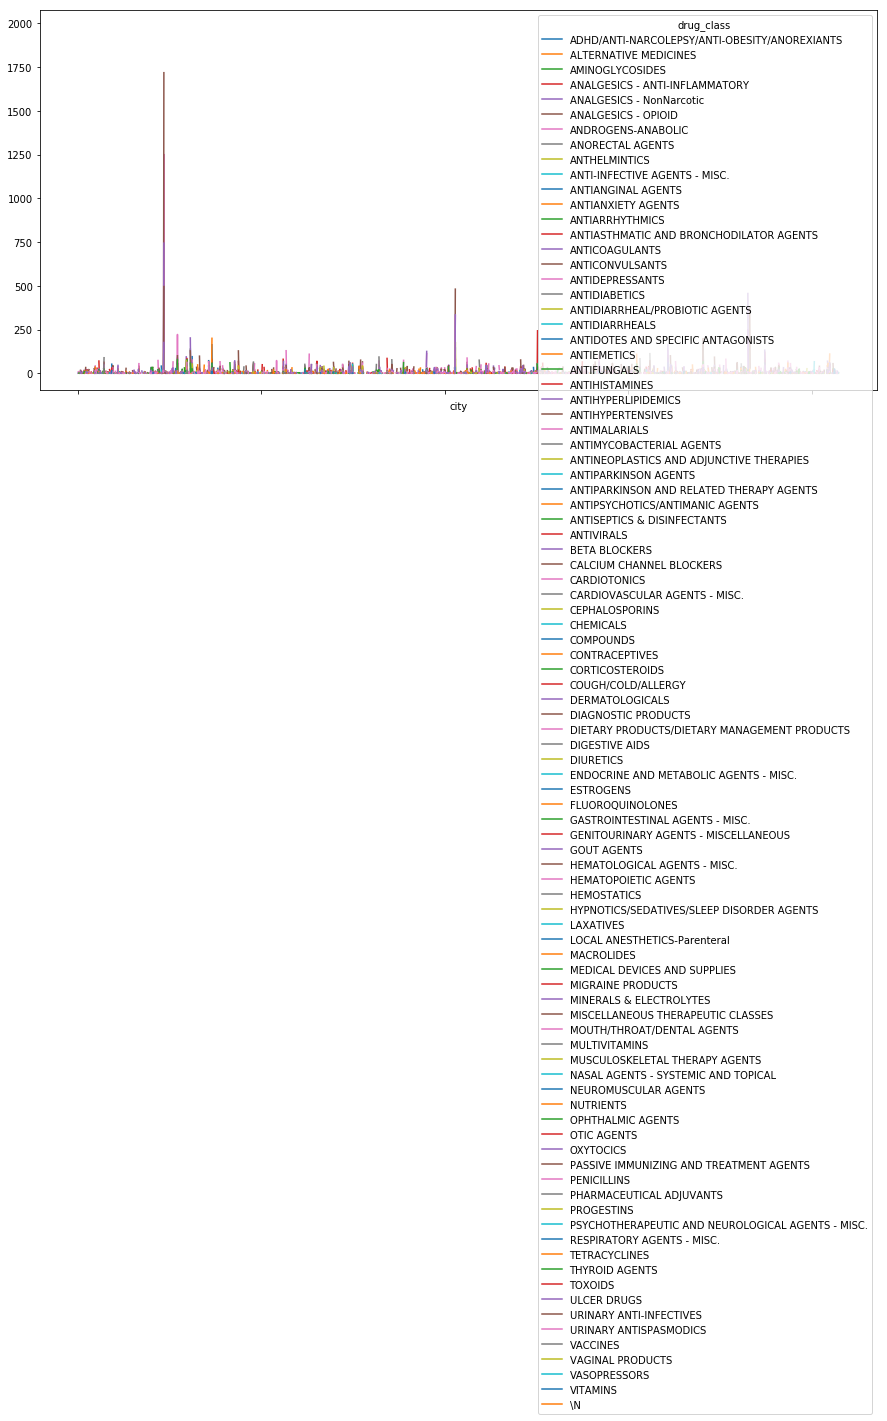

In [81]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['city', 'drug_class'])['id'].count().unstack().plot(ax=ax)

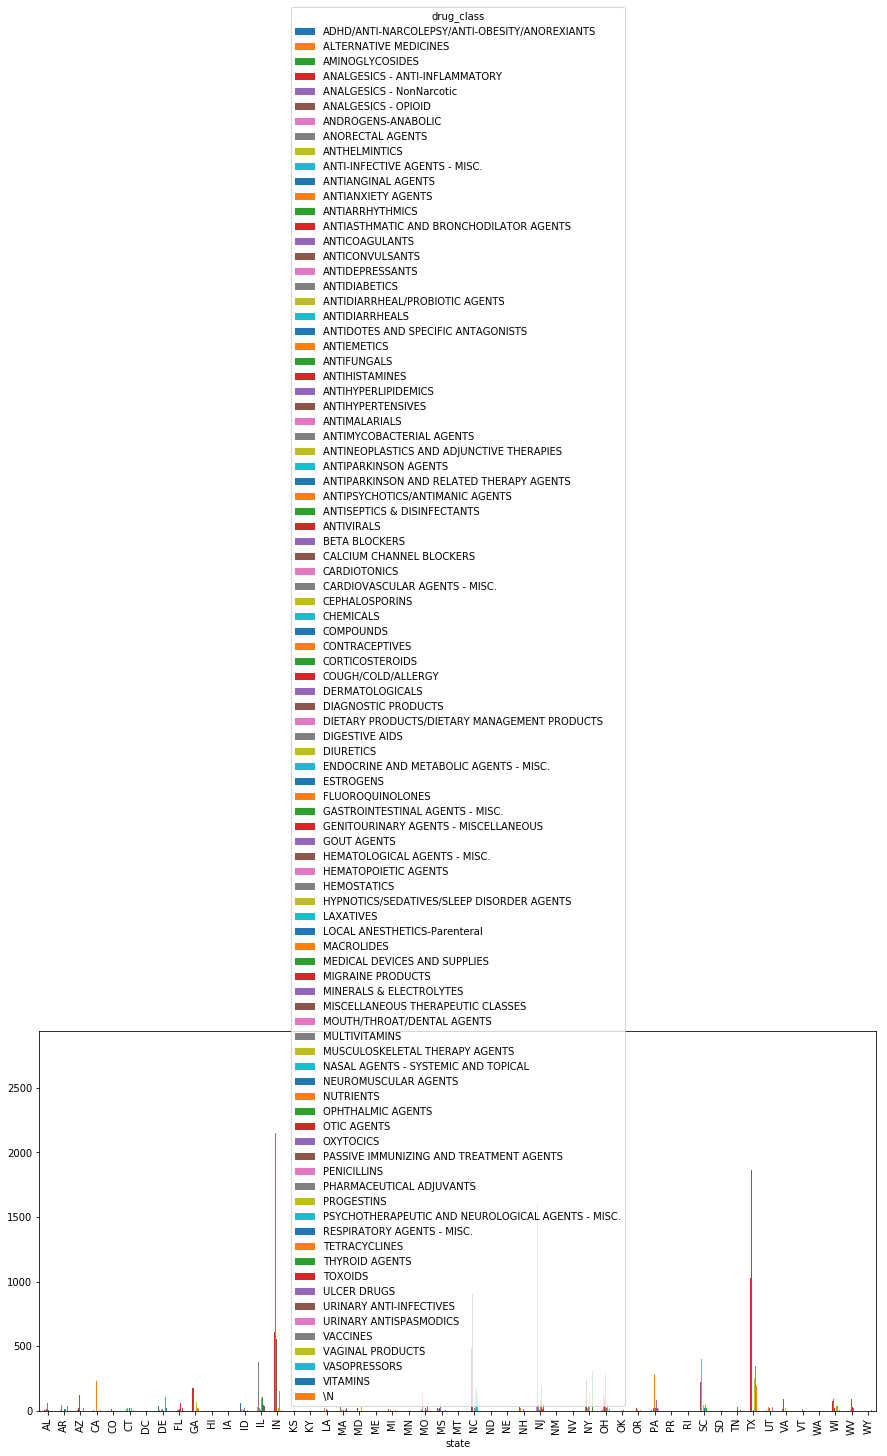

In [85]:
fig, ax = plt.subplots(figsize=(15,7))

data.groupby(['state', 'drug_class'])['id'].count().unstack().plot(kind="bar", ax=ax)

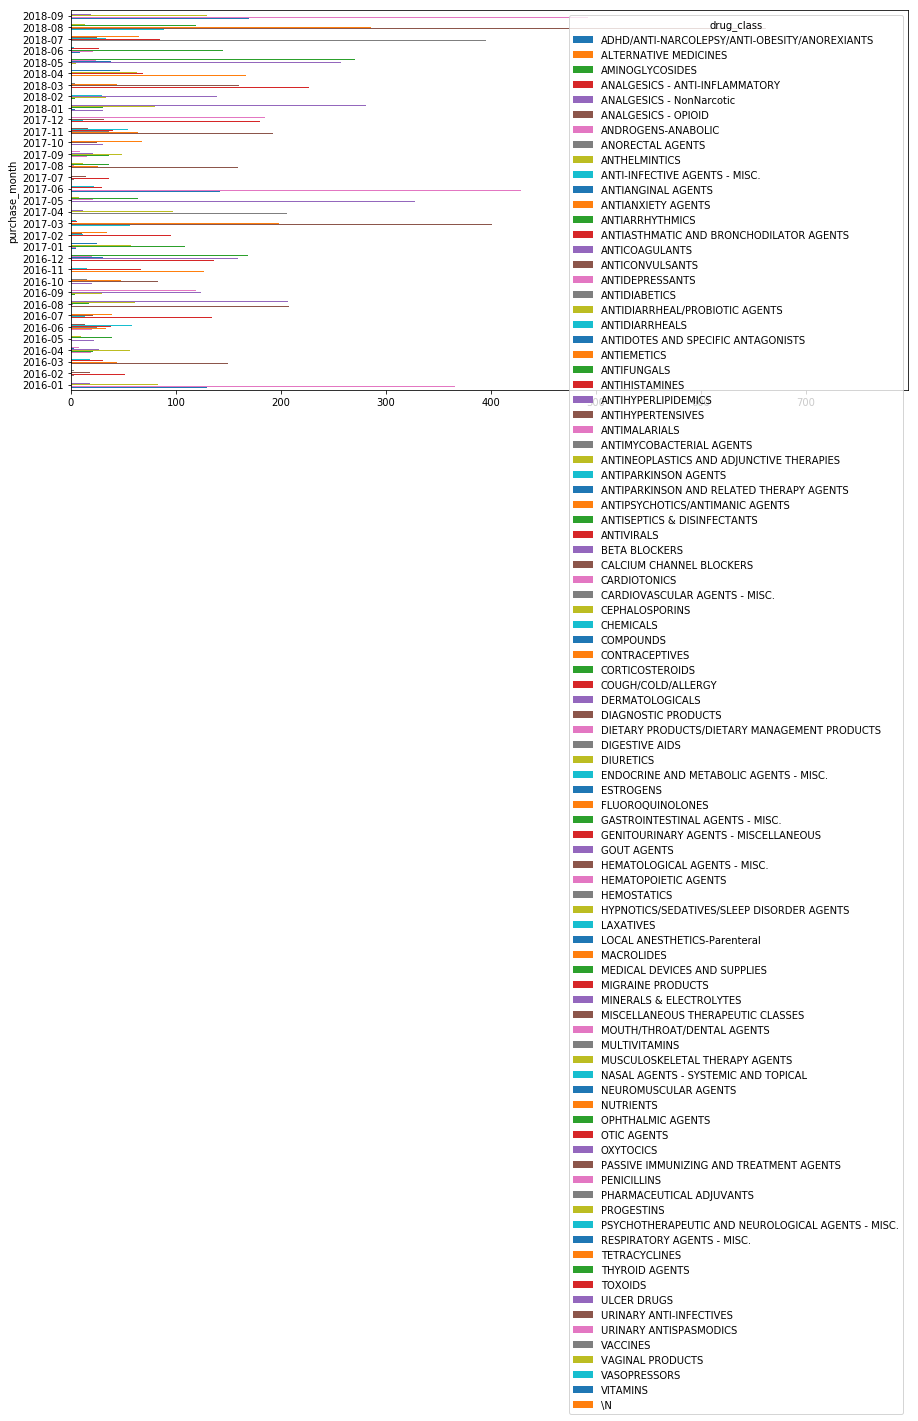

In [88]:
fig, ax = plt.subplots(figsize=(15,7))

data.groupby(['purchase_month', 'drug_class'])['id'].count().unstack().plot(kind="barh", ax=ax)

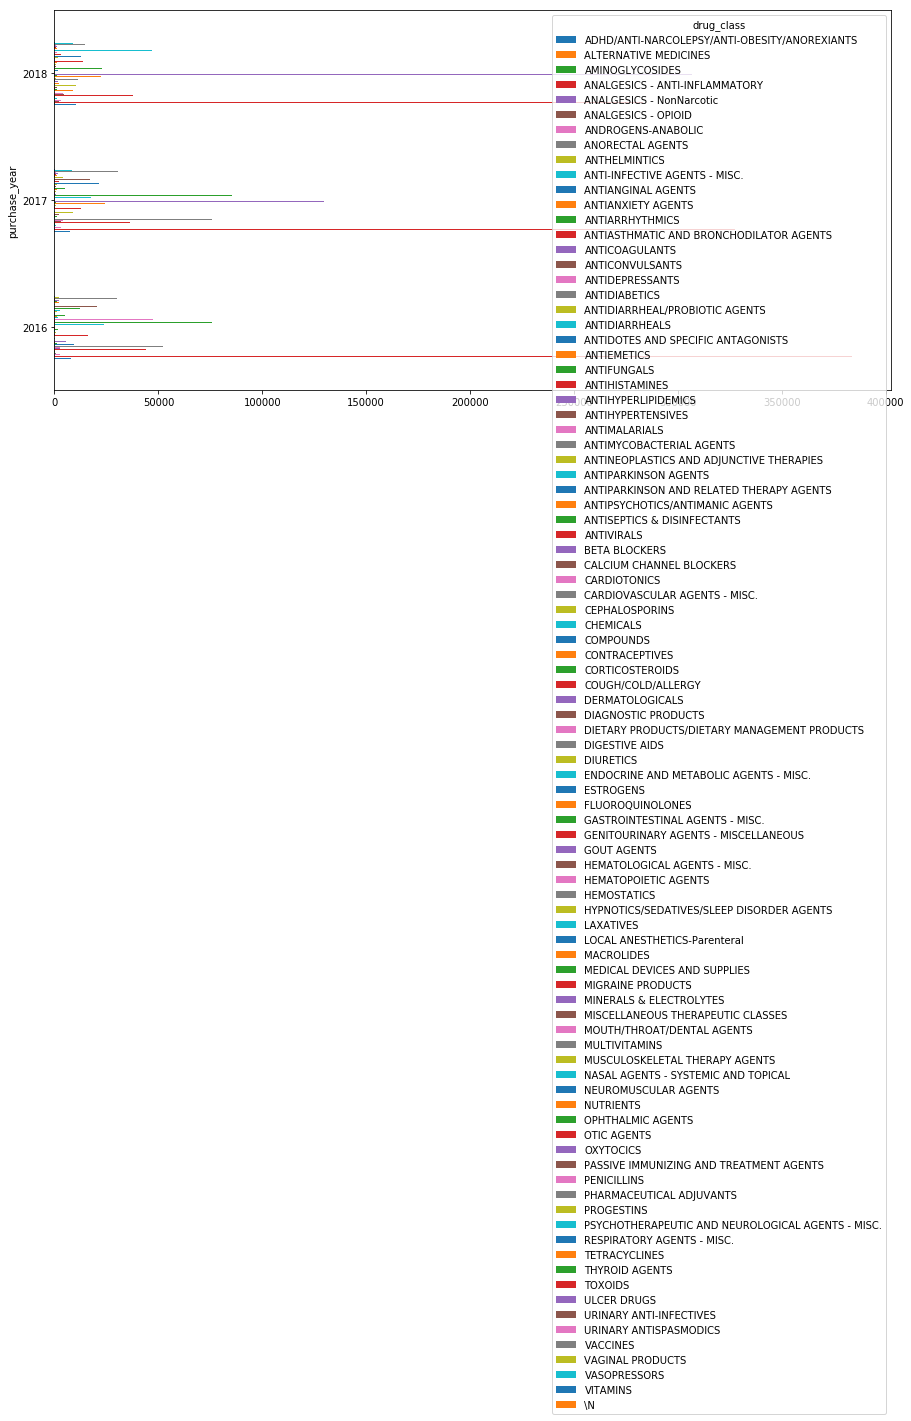

In [91]:
fig, ax = plt.subplots(figsize=(15,7))

data.groupby(['purchase_year', 'drug_class'])['unit_price'].sum().unstack().plot(kind="barh", ax=ax)

In [110]:
data.groupby(['purchase_year', 'drug_class'])['unit_price'].sum().reset_index(name='sum').sort_values(['sum'], ascending=[False]).head(10)


,purchase_year,drug_class,sum
3,2016,ANALGESICS - ANTI-INFLAMMATORY,383579.4792
87,2017,ANALGESICS - ANTI-INFLAMMATORY,327437.4794
212,2018,DERMATOLOGICALS,306714.9796
172,2018,ANALGESICS - ANTI-INFLAMMATORY,283198.7413
41,2016,DERMATOLOGICALS,199300.3312
125,2017,DERMATOLOGICALS,129539.3457
186,2018,ANTIDIABETICS,85822.9065
133,2017,GASTROINTESTINAL AGENTS - MISC.,85549.3035
48,2016,GASTROINTESTINAL AGENTS - MISC.,75996.6899
101,2017,ANTIDIABETICS,75838.7567


In [112]:
data.groupby(['purchase_year', 'drug_class'])['unit_price'].count().reset_index(name='sum').sort_values(['sum'], ascending=[False]).head(10)



,drug_class,sum
16,ANTIDEPRESSANTS,15777
25,ANTIHYPERTENSIVES,14756
24,ANTIHYPERLIPIDEMICS,12043
17,ANTIDIABETICS,8753
5,ANALGESICS - OPIOID,7240
41,CONTRACEPTIVES,7064
84,ULCER DRUGS,6988
13,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,6689
82,THYROID AGENTS,5822
15,ANTICONVULSANTS,5739


In [113]:
data.groupby(['drug_class'])['unit_price'].count().reset_index(name='sum').sort_values(['sum'], ascending=[False]).head(10)


,drug_class,sum
16,ANTIDEPRESSANTS,15777
25,ANTIHYPERTENSIVES,14756
24,ANTIHYPERLIPIDEMICS,12043
17,ANTIDIABETICS,8753
5,ANALGESICS - OPIOID,7240
41,CONTRACEPTIVES,7064
84,ULCER DRUGS,6988
13,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,6689
82,THYROID AGENTS,5822
15,ANTICONVULSANTS,5739


In [114]:
data.groupby(['drug_class'])['unit_price'].sum().reset_index(name='sum').sort_values(['sum'], ascending=[False]).head(10)



,drug_class,sum
3,ANALGESICS - ANTI-INFLAMMATORY,994215.6999
44,DERMATOLOGICALS,635554.6565
17,ANTIDIABETICS,214043.9305
52,GASTROINTESTINAL AGENTS - MISC.,184614.6077
79,PSYCHOTHERAPEUTIC AND NEUROLOGICAL AGENTS - MISC.,128852.8825
13,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,117989.5789
49,ENDOCRINE AND METABOLIC AGENTS - MISC.,105207.2624
56,HEMATOPOIETIC AGENTS,80763.5684
87,VACCINES,75340.5125
41,CONTRACEPTIVES,67983.4146


In [115]:
data.groupby(['drug_class'])['unit_price'].mean().reset_index(name='sum').sort_values(['sum'], ascending=[False]).head(10)



,drug_class,sum
75,PASSIVE IMMUNIZING AND TREATMENT AGENTS,1529.136261
70,NEUROMUSCULAR AGENTS,893.207069
20,ANTIDOTES AND SPECIFIC ANTAGONISTS,296.936322
52,GASTROINTESTINAL AGENTS - MISC.,291.190233
89,VASOPRESSORS,197.511548
3,ANALGESICS - ANTI-INFLAMMATORY,182.693072
79,PSYCHOTHERAPEUTIC AND NEUROLOGICAL AGENTS - MISC.,177.728114
49,ENDOCRINE AND METABOLIC AGENTS - MISC.,167.794677
80,RESPIRATORY AGENTS - MISC.,149.132200
44,DERMATOLOGICALS,123.938116
